# LOGISTIC REGRESSION CLASSIFICATION MODEL

We present and import all the libraries that we are going to need throughout the model.

In [1]:
import pandas as pd
import numpy as np

# Metric Libraries
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Visualization Libraries
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from collections import Counter
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss 



We read and present our Database. We show the first 5 rows, the type and name of the Columns / variables that compose it. The variables that refer to business units are not going to be used in the model so we transform them to Object for a better understanding and segmentation of the variables themselves.

In [2]:
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [3]:
# We transform business unit variables into object since we do not want to use them.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [4]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475,ASESORAMIENTO FINANCIERO,14204,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000,ASESORAMIENTO FINANCIERO,14219,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [5]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## First aproach to the model

In [6]:
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [8]:
# Instantiate the classifier
clf_log_regressor_first_aproach = LogisticRegression()

In [9]:
# We train the model
clf_log_regressor_first_aproach.fit(X,y)

LogisticRegression()

In [10]:
# We draw the first predictions
clf_log_regressor_first_aproach.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
# We divide our DF into Training Set 80% and Test Set 20%.  
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
# We train the model
clf_log_regressor_first_aproach.fit(X_train,y_train)

LogisticRegression()

In [13]:
# We draw the first predictions
clf_log_regressor_first_aproach.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# Get probabilities on 1 "Have Home Insurance".
clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1]

array([0.31004564, 0.13072842, 0.17100719, ..., 0.07256822, 0.13290052,
       0.03860107])

In [15]:
# Results obtained from the model.

accuracy_score_first_aproach = accuracy_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
precision_first_aproach  = precision_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
recall_first_aproach = recall_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
f1_score_first_aproach = f1_score(y_test,clf_log_regressor_first_aproach.predict(X_test))
roc_auc_score_first_aproach = roc_auc_score(y_test,clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1])

print('== First Aproximation CLR_model ==')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_first_aproach)
print('------------------------------------')
print('precision  =',precision_first_aproach)
print('------------------------------------')
print('recall =', recall_first_aproach)
print('------------------------------------')
print('f1_score =', f1_score_first_aproach)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_first_aproach)

== First Aproximation CLR_model ==
------------------------------------
accuracy_score = 0.8687565771254501
------------------------------------
precision  = 0.4470588235294118
------------------------------------
recall = 0.022571064913025032
------------------------------------
f1_score = 0.042972536348949916
------------------------------------
roc_auc_score = 0.4880382752670486


Without training: ROC AUC=0.500
Logistic Regression: ROC AUC=0.488


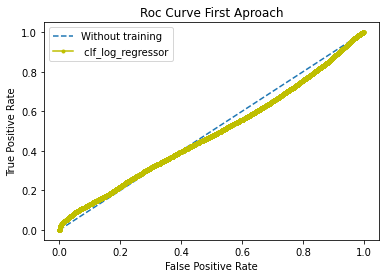

In [16]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_first_aproach.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Axes labels
pyplot.title('Roc Curve First Aproach')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/CLR Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Building the Model

In [17]:
# Read Data Frame 
df_normalized = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [18]:
# Inputs & Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


## Balance

We have seen in EDA that Target it is very unbalanced. We will use 3 different formulas to fix this umbalance. After training the three options Weigth balanced & Smote give the best results. NearMiss gets very low results

- Penalty to compensate __Weigth balanced__
- NearMiss
- Smote

### 1st strategy: Penalty to compensate for Weigth balanced

In [19]:
# Chosen Solver liblinear. 'newton-cg' does not converge. 
clf_log_regressor_wb = LogisticRegression(solver = 'liblinear', class_weight='balanced')

In [20]:
# We adjust our training and test set. (80-20)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [21]:
# We train our model
clf_log_regressor_wb.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [22]:
# First predictions 
clf_log_regressor_wb.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [23]:
# Probabiliteis for option 1 "Has Home Insurance" 
clf_log_regressor_wb.predict_proba(X_test)[:, 1]

array([0.51437495, 0.14824863, 0.03242294, ..., 0.19294869, 0.82027084,
       0.03561958])

__First results__. The results obtained in Train are very close to those obtained in Test. Our trained model is generalizing well and we can consider it as good for now, but we still need to get better metrics. There is no overfitting.  We confirm that it generalizes well with Cross Validation by taking the averages of the different metrics.

In [24]:
# Look out for oversampling. First results with the chosen metric "Recall" to see if our model generalizes well.
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clf_log_regressor_wb.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clf_log_regressor_wb.predict(X_test)))


===========RECALL TRAIN============
recall = 0.8798620509014712
===========RECALL TEST=============
recall = 0.8873825979089137


## Cross validation techniques.  Metrics: Cross validation
We use Cross Validation to iterate with 'K_folds_times' throughout the training set.
- K_Fold used 5 times.

- We will set aside 1/5 samples.
- We train the model with the remaining 4/5 samples.
- We will measure with different metrics the result obtained on the set aside samples.
- This means that we do 5 independent trainings.
- The results will be the average of the 5 previous metrics.

In [25]:
kf = KFold(n_splits=5)

In [26]:
cross_val_score_precision = cross_val_score(clf_log_regressor_wb,X,y,cv=kf,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clf_log_regressor_wb,X,y,cv=kf,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clf_log_regressor_wb,X,y,cv=5,scoring="f1").mean()
print('Cross Validation: ', cross_val_score_precision , cross_val_score_recall, cross_val_score_f1)

Cross Validation:  0.28251207153830904 0.8797172879719719 0.42870319618643915


### Confussion Matrix

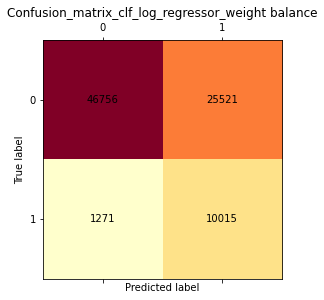

In [27]:
# Plot Confussion matrix 
confusion_matrix_clf_log_regressor_wb = confusion_matrix(y_test,clf_log_regressor_wb.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(confusion_matrix_clf_log_regressor_wb, cmap=plt.cm.YlOrRd)
for i in range(confusion_matrix_clf_log_regressor_wb.shape[0]):
    for j in range(confusion_matrix_clf_log_regressor_wb.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_clf_log_regressor_wb[i, j], va='center', ha='center')

plt.title('Confusion_matrix_clf_log_regressor_weight balance')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/CLR Model - Confusion_matrix_clf_log_regressor_weight balance.png', dpi=75,bbox_inches='tight')
plt.show()


### CLR Model Weigth balanced Results

In [28]:
# Results obtained from the model.

accuracy_score_weigth_balance = accuracy_score(y_test,clf_log_regressor_wb.predict(X_test))
precision_weigth_balance  = precision_score(y_test,clf_log_regressor_wb.predict(X_test))
recall_weigth_balance = recall_score(y_test,clf_log_regressor_wb.predict(X_test))
f1_score_weigth_balance = f1_score(y_test,clf_log_regressor_wb.predict(X_test))
roc_auc_score_weigth_balance = roc_auc_score(y_test,clf_log_regressor_wb.predict_proba(X_test)[:, 1])

print('==== CLR_Weigth balanced RESULTS ====')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_weigth_balance)
print('------------------------------------')
print('precision  =',precision_weigth_balance)
print('------------------------------------')
print('recall =', recall_weigth_balance)
print('------------------------------------')
print('f1_score =', f1_score_weigth_balance)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_weigth_balance)

==== CLR_Weigth balanced RESULTS ====
------------------------------------
accuracy_score = 0.6793796297404353
------------------------------------
precision  = 0.28182687978388116
------------------------------------
recall = 0.8873825979089137
------------------------------------
f1_score = 0.427790354961343
------------------------------------
roc_auc_score = 0.8282334472601741


## Roc Cuve balanced with class weigth

Without training: ROC AUC=0.500
Logistic Regression: ROC AUC=0.828


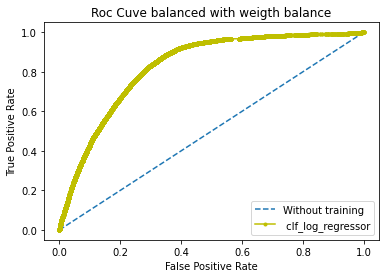

In [29]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_wb.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_wb.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Axes labels
pyplot.title('Roc Cuve balanced with weigth balance')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/CLR Model - Roc Cuve Balanced with Weigth Balance.png', dpi=75,bbox_inches='tight')
pyplot.show()

### 2nd Strategy: Subsampling in the majority class.  With __NearMiss__


In [30]:
# Instantiate classifier 
clf_log_regressor_nm = LogisticRegression(solver = 'liblinear')

In [31]:
# Train de Model
clf_log_regressor_nm.fit(X,y)

LogisticRegression(solver='liblinear')

In [32]:
# First Predictions
clf_log_regressor_nm.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
# Balancing with NearMiss "
from imblearn.under_sampling import NearMiss
nr = NearMiss() 

In [34]:
# We adjust our training and test set Without pca. (80-20)
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)  

In [35]:
# Information on the distribution of data before and after Nearmiss balancing
from collections import Counter
print ("Distribution before NearMiss: {} ".format(Counter(y_train)))
print('====================================')
print ("Distribution after NearMiss: : {} ".format(Counter(y_train_miss)))


Distribution before NearMiss: Counter({0.0: 288435, 1.0: 45814}) 
Distribution after NearMiss: : Counter({0.0: 45814, 1.0: 45814}) 


In [36]:
# We train our model 
clf_log_regressor_nm.fit(X_train_miss, y_train_miss) 

LogisticRegression(solver='liblinear')

In [37]:
# predictions 
clf_log_regressor_nm.predict(X_test)

array([1., 0., 0., ..., 1., 1., 0.])

In [38]:
# Probabilities
clf_log_regressor_nm.predict_proba(X_test)[:, 1]

array([0.95399776, 0.08959986, 0.22343631, ..., 0.62982046, 0.94622198,
       0.27750429])

##  CLR Model Nearmiss Results

In [39]:
# Results obtained from the model.

accuracy_score_nearmiss = accuracy_score(y_test,clf_log_regressor_nm.predict(X_test))
precision_nearmiss  = precision_score(y_test,clf_log_regressor_nm.predict(X_test))
recall_nearmiss = recall_score(y_test,clf_log_regressor_nm.predict(X_test))
f1_score_nearmiss = f1_score(y_test,clf_log_regressor_nm.predict(X_test))
roc_auc_score_nearmiss = roc_auc_score(y_test,clf_log_regressor_nm.predict_proba(X_test)[:, 1])

print('==== CLR Nearmiss RESULTS ====')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_nearmiss)
print('------------------------------------')
print('precision  =',precision_nearmiss)
print('------------------------------------')
print('recall =', recall_nearmiss)
print('------------------------------------')
print('f1_score =', f1_score_nearmiss)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_nearmiss)

==== CLR Nearmiss RESULTS ====
------------------------------------
accuracy_score = 0.6228115314194081
------------------------------------
precision  = 0.21620332706819648
------------------------------------
recall = 0.6828814460393408
------------------------------------
f1_score = 0.3284256280229263
------------------------------------
roc_auc_score = 0.7183664949438875


## Roc Cuve balanced with  Nearmiss

Without training: ROC AUC=0.500
Logistic Regression: ROC AUC=0.718


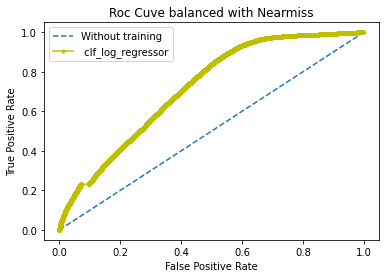

In [40]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_nm.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_nm.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Axes labels
pyplot.title('Roc Cuve balanced with Nearmiss')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/CLR Model - Roc Cuve Balanced with Nearmiss.png', dpi=75,bbox_inches='tight')
pyplot.show()

### 3rd Strategy: Subsampling in the majority class  with __Smote__

In [41]:
# Balancing with Smote
sm = SMOTE(random_state = 2) 

In [42]:
clf_log_regressor_smote = LogisticRegression(solver = 'liblinear')

In [43]:
clf_log_regressor_smote.fit(X,y)

LogisticRegression(solver='liblinear')

In [44]:
clf_log_regressor_smote.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
# Train the model
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [46]:
# Information on the distribution of data before and after Smote balancing
print ("Distribution before Smote : {} ".format(Counter(y_train)))
print('====================================')
print ("Distribution after Smote : {} ".format(Counter(y_train_smote)))

Distribution before Smote : Counter({0.0: 288435, 1.0: 45814}) 
Distribution after Smote : Counter({0.0: 288435, 1.0: 288435}) 


In [47]:
# Train the model
clf_log_regressor_smote.fit(X_train_smote, y_train_smote) 

LogisticRegression(solver='liblinear')

In [48]:
# Predictions
clf_log_regressor_smote.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [49]:
# Probabilities
clf_log_regressor_smote.predict_proba(X_test)[:, 1]

array([0.50517982, 0.14673553, 0.03125346, ..., 0.18933869, 0.82615103,
       0.03354777])

##  CLR Model Smote Results

In [50]:
# Results obtained from the model.

accuracy_score_smote = accuracy_score(y_test,clf_log_regressor_smote.predict(X_test))
precision_smote  = precision_score(y_test,clf_log_regressor_smote.predict(X_test))
recall_smote = recall_score(y_test,clf_log_regressor_smote.predict(X_test))
f1_score_smote = f1_score(y_test,clf_log_regressor_smote.predict(X_test))
roc_auc_score_smote = roc_auc_score(y_test,clf_log_regressor_smote.predict_proba(X_test)[:, 1])

print('==== CLR Smote RESULTS ====')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_smote)
print('------------------------------------')
print('precision  =',precision_smote)
print('------------------------------------')
print('recall =', recall_smote)
print('------------------------------------')
print('f1_score =', f1_score_smote)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_smote)

==== CLR Smote RESULTS ====
------------------------------------
accuracy_score = 0.6800976508741907
------------------------------------
precision  = 0.2822421474087859
------------------------------------
recall = 0.8869395711500975
------------------------------------
f1_score = 0.42821697467488024
------------------------------------
roc_auc_score = 0.8283825158928472


## Roc Cuve balanced with  Smote

Without training: ROC AUC=0.500
Logistic Regression: ROC AUC=0.828


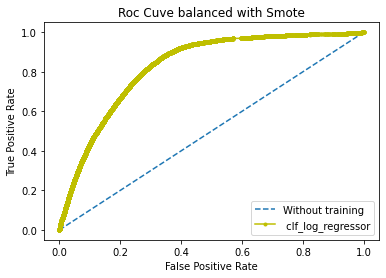

In [51]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clf_log_regressor_smote.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor_smote.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Axes labels
pyplot.title('Roc Cuve balanced with Smote')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/CLR Model - Roc Cuve Balanced with Smote.png', dpi=75,bbox_inches='tight')
pyplot.show()

In [52]:
print('Results 1rst aproach: RECALL %f, AUC %f' %(recall_first_aproach, roc_auc_score_first_aproach))
print('Results with Weight Balance: RECALL %f, AUC %f' %(recall_weigth_balance, roc_auc_score_weigth_balance))
print('Results with Smote: RECALL %f, AUC %f' %(recall_smote, roc_auc_score_smote))
print('Results with Nearmiss: RECALL %f, AUC %f' %(recall_nearmiss, roc_auc_score_nearmiss))

Results 1rst aproach: RECALL 0.022571, AUC 0.488038
Results with Weight Balance: RECALL 0.887383, AUC 0.828233
Results with Smote: RECALL 0.886940, AUC 0.828383
Results with Nearmiss: RECALL 0.682881, AUC 0.718366


# *** Model Conclusions 

 The main metrics chosen for the Logistic Regression Classification Model to decide if we have a good result are the Recall Metric and AUC - Roc Curve. 
 
 Final Results:

       - Results 1rst aproach: RECALL 0.022571, AUC 0.488038
       - Results with Weight Balance: RECALL 0.887383, AUC 0.828233
       - Results with Smote: RECALL 0.886940, AUC 0.828383
       - Results with Nearmiss: RECALL 0.682881, AUC 0.718366
- We start our model with a __first approximation__ obtaining __very improvable__ results. Recall 0.02.__ The database used is the original one without any preprocessing. 
- We continue to evolve our model. We have not used database with pca because previously in EDA we have seen that it was not necessary. We use database with normalization and label encoder. 
- We confirm that our training set has generalized well as there is not much difference between the results obtained from Test and Train. We can rule out overfitting we have checked it by Cross Validation by obtaining averages of different metrics.

- Since our __Target is very unbalanced__ at the rate of 87% (No) and 13% (Yes), we have used _3 different ways of treatment of overfitting in the model estimation. Class Weigth, Nearmiss and Smote. After training the three possibilities, we finally settled on Class Weigth.
- The final metrics are: Recall 0.887 - Auc 0.835.
- __Consfussion Matrix__ - In the diagonal of hits we have 46756 True Negatives and 10015 True Positives. In our model, the detection of clients who do want to take out insurance is a priority.  We need to obtain a good rate of true positives.  By detecting those customers who are likely to have home insurance, we can work more directly. All this with the objective of time optimization and commercial efficiency. The Recall result obtained is optimal having obtained 88%. The Auc rate is 82%.
- Despite the result, we are missing, among many others, variables and data such as income of customers, children, type of work, real salary in euros obtained, place of residence ... etc.. 
- We will continue searching with other models for better results with the available variables.
